# ***gestures***

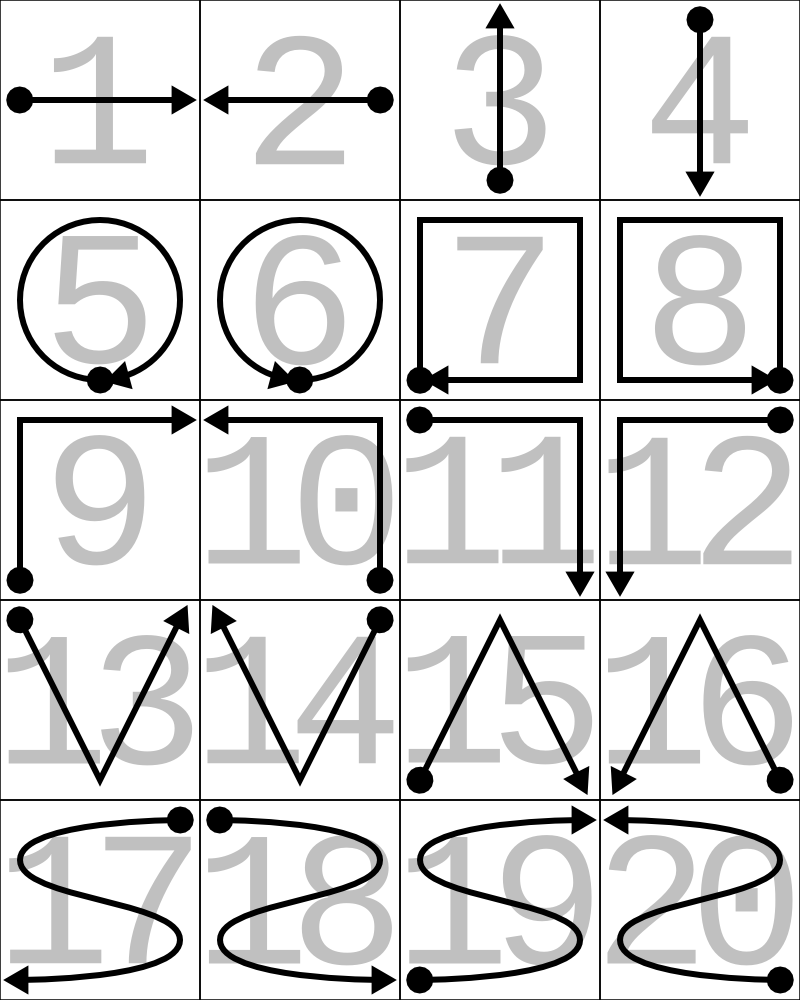

In [4]:
from IPython.display import Image
Image(r'C:\Users\irina\Desktop\AI wearables\gestures-dataset\gestures.png')

# LSTM Model 15 Gestures

## Data 

***download***

In [5]:
import os
import pandas as pd

In [6]:
path = r'C:\Users\irina\Desktop\AI wearables\gestures-dataset'
           

gesture_subset = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15']

#folders of each user
user_folders=['U01', 'U02', 'U03', 'U04', 'U05', 'U06', 'U07', 'U08']    


column_names = ['System.currentTimeMillis()', 'System.nanoTime()', 'sample.timestamp', 'X', 'Y', 'Z']

df=None

samples = 0
dataset=None

for user in os.listdir(path):
    if os.path.isfile(os.path.join(path, user)): # if not folder -> continue
            continue
    if user in user_folders: 
        for gesture in os.listdir(os.path.join(path, user)): #for each folder with gestures
            if gesture not in gesture_subset: # continue if folder is not in the set of gestures folders
                continue
            for samplefile in os.listdir(os.path.join(path, user, gesture)): #for in sample folder
                if os.path.isfile(os.path.join(path, user, gesture, samplefile)):# if not folder -> continue
                    
                    df = pd.read_csv(os.path.join(path, user, gesture, samplefile),sep = ' ',names = column_names)
                    df = df[["sample.timestamp", "X", "Y", "Z"]]
                    
                    df['sample.timestamp']=(df['sample.timestamp']-df['sample.timestamp'][0])/100000
                    
                    df["user"] = user
                    df["gesture"] = gesture
                    df["sample"] = str(samplefile[:-4])
                    samples += 1
                    if dataset is None:
                            dataset = df.copy()
                    else:
                            dataset = pd.concat([dataset, df])
                                     
                             
dataset = dataset.sort_values(by=['gesture','user','sample','sample.timestamp'])  
data = dataset 

data

,sample.timestamp,X,Y,Z,user,gesture,sample
0,0.0,1.532289,-0.919373,10.113108,U01,01,01
1,1100.0,0.919373,-0.919373,9.959879,U01,01,01
2,2200.0,1.838747,-0.153229,10.726024,U01,01,01
3,3300.0,5.822699,3.371036,10.879252,U01,01,01
4,4400.0,6.435614,1.532289,9.193734,U01,01,01
...,...,...,...,...,...,...,...
11,12100.0,3.983952,-3.677494,8.887277,U08,15,20
12,13200.0,4.137181,-3.677494,8.887277,U08,15,20
13,14300.0,1.225831,-3.983952,8.274362,U08,15,20
14,15400.0,4.290410,-3.677494,8.427590,U08,15,20


***splitting dataset***

In [7]:
data_train=data[data['user'].isin(['U01','U02','U03','U04','U05','U06'])]
data_test = data[data['user'].isin(['U07','U08'])]

data_test

,sample.timestamp,X,Y,Z,user,gesture,sample
0,0.0,1.991976,-1.379060,9.806650,U07,01,01
1,1100.0,1.532289,-0.766145,9.806650,U07,01,01
2,2200.0,3.371036,0.766145,10.572795,U07,01,01
3,3300.0,3.524265,3.064578,10.419566,U07,01,01
4,4400.0,5.209783,1.685518,10.726024,U07,01,01
...,...,...,...,...,...,...,...
11,12100.0,3.983952,-3.677494,8.887277,U08,15,20
12,13200.0,4.137181,-3.677494,8.887277,U08,15,20
13,14300.0,1.225831,-3.983952,8.274362,U08,15,20
14,15400.0,4.290410,-3.677494,8.427590,U08,15,20


***scaling***

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



################### train #######################

dataset_scaled = None

samples = 0
for i, gesture in enumerate(gesture_subset):
    df_gesture=data_train[data_train['gesture']==gesture] 
    for j, user in enumerate(df_gesture['user'].unique()):
        df_user=df_gesture[df_gesture['user']==user]
        for k, sample in enumerate(df_user['sample'].unique()):
            df_sample=df_user[df_user['sample']==sample].copy()
            df_sample.sort_values(by=['sample.timestamp'])

            sc = scaler
            sc = sc.fit_transform(df_sample[["X", "Y", "Z"]])
            sc = pd.DataFrame(data=sc, columns=["X", "Y", "Z"])
            
            df_sample['X'] = sc['X']
            df_sample['Y'] = sc['Y']
            df_sample['Z'] = sc['Z']
            
            if dataset_scaled is None:
                dataset_scaled = df_sample.copy()
            else:
                dataset_scaled = pd.concat([dataset_scaled, df_sample])
            samples += 1
            
data_train = dataset_scaled    

data_train

,sample.timestamp,X,Y,Z,user,gesture,sample
0,0.0,0.046662,0.178172,0.383203,U01,01,01
1,1100.0,-0.243681,0.178172,0.139347,U01,01,01
2,2200.0,0.191834,0.455329,1.358630,U01,01,01
3,3300.0,2.079060,1.730249,1.602485,U01,01,01
4,4400.0,2.369403,1.065073,-1.079937,U01,01,01
...,...,...,...,...,...,...,...
15,16500.0,-0.249041,0.403690,-0.137339,U06,15,20
16,17600.0,-0.308102,0.403690,-0.172330,U06,15,20
17,18700.0,-0.229354,0.161130,-0.102348,U06,15,20
18,19800.0,-0.288414,0.334387,-0.032366,U06,15,20


In [9]:
#################  test #######################

dataset_scaled = None

samples = 0

for i, gesture in enumerate(gesture_subset):
    df_gesture=data_test[data_test['gesture']==gesture] 
    for j, user in enumerate(df_gesture['user'].unique()):
        df_user=df_gesture[df_gesture['user']==user]
        for k, sample in enumerate(df_user['sample'].unique()):
            df_sample=df_user[df_user['sample']==sample].copy()
            df_sample.sort_values(by=['sample.timestamp'])

            sc = scaler
            sc = sc.fit_transform(df_sample[["X", "Y", "Z"]])
            sc = pd.DataFrame(data=sc, columns=["X", "Y", "Z"])
            
            df_sample['X'] = sc['X']
            df_sample['Y'] = sc['Y']
            df_sample['Z'] = sc['Z']
            
            if dataset_scaled is None:
                dataset_scaled = df_sample.copy()
            else:
                dataset_scaled = pd.concat([dataset_scaled, df_sample])
            samples += 1
            
data_test = dataset_scaled 

data_test

,sample.timestamp,X,Y,Z,user,gesture,sample
0,0.0,-0.027984,-0.071392,-0.140334,U07,01,01
1,1100.0,-0.330207,0.271290,-0.140334,U07,01,01
2,2200.0,0.878687,1.127996,1.263007,U07,01,01
3,3300.0,0.979428,2.413055,0.982339,U07,01,01
4,4400.0,2.087581,1.642020,1.543675,U07,01,01
...,...,...,...,...,...,...,...
11,12100.0,0.646230,0.142159,0.009963,U08,15,20
12,13200.0,0.728948,0.142159,0.009963,U08,15,20
13,14300.0,-0.842684,0.025516,-0.117563,U08,15,20
14,15400.0,0.811665,0.142159,-0.085681,U08,15,20


In [10]:
# print("Cleaning Dataset for gestures: ", gesture_subset)
# dataset_outliers = None
# dataset_cleaned = None

# samples = 0
# outliers = 0
# for i, gesture in enumerate(gesture_subset):
#     df_gesture = data[data['gesture']==gesture]
#     for j, subject in enumerate(df_gesture['user'].unique()):
#         df_subject = df_gesture[df_gesture['user']==subject]

#         time_mean = df_subject.groupby(["gesture","user", "sample"]).count().groupby(["gesture","user"]).agg({'sample.timestamp': ['mean']})
#         time_std = df_subject.groupby(["gesture","user", "sample"]).count().groupby(["gesture","user"]).agg({'sample.timestamp': ['std']})
#         time_max = time_mean['sample.timestamp'].iloc[0]['mean'] + 1.0 * time_std['sample.timestamp'].iloc[0]['std']
#         time_min = time_mean['sample.timestamp'].iloc[0]['mean'] - 1.0 * time_std['sample.timestamp'].iloc[0]['std']
#         for k, sample in enumerate(df_subject['sample'].unique()):
#             df_sample=df_subject[df_subject['sample']==sample]
#             df_sample_count = df_sample.count()['sample.timestamp']
#             if df_sample_count > time_min or df_sample_count < time_max:
#                 if dataset_cleaned is None:
#                     dataset_cleaned = df_sample.copy()
#                 else:
#                     dataset_cleaned = pd.concat([dataset_cleaned, df_sample])
#                 samples += 1
# print(str(samples) + " samples cleaned")
# print(str(outliers) + " samples outliers")
# data = dataset_cleaned

***time slicing***

In [11]:
################### train #######################

dataset_timecut = None
samples = 0
damaged = 0

for i, gesture in enumerate(data_train['gesture'].unique()):
    df_gesture = data_train[data_train['gesture']==gesture]
    for j, user in enumerate(df_gesture['user'].unique()):
        df_user = df_gesture[df_gesture['user']==user] 
        time_max = 19 # 18 * 11 = 198
        for i, sample in enumerate(df_user['sample'].unique()):
            df_sample = df_user[df_user['sample']==sample]
            df_sample_count = df_sample.count()['sample.timestamp']
            #print(df_sample_count)
            if df_sample_count >= time_max:
                df_sample = df_sample[df_sample['sample.timestamp'] <= (11 * (time_max-1))]
                df_sample_count = df_sample.count()['sample.timestamp']
                #print(df_sample_count)
            elif df_sample_count < time_max:
                for tmp in range(df_sample_count * 11, (time_max) * 11, 11):
                    df = pd.DataFrame([[tmp, 0.0, 0.0, 0.0, gesture, user, sample]], columns=['sample.timestamp', 'X', 'Y', 'Z', 'gesture', 'user', 'sample'])
                    df_sample = df_sample.append(df, ignore_index=True)            
            #print(df_sample)
            df_sample_count = df_sample.count()['sample.timestamp']
            #print(df_sample_count)
            if df_sample_count != time_max:
                damaged += 1
                continue
            if dataset_timecut is None:
                dataset_timecut = df_sample.copy()
            else:
                dataset_timecut = pd.concat([dataset_timecut, df_sample])
            samples += 1

data_train = dataset_timecut
data_train

,sample.timestamp,X,Y,Z,user,gesture,sample
0,0.0,0.046662,0.178172,0.383203,U01,01,01
1,1100.0,-0.243681,0.178172,0.139347,U01,01,01
2,2200.0,0.191834,0.455329,1.358630,U01,01,01
3,3300.0,2.079060,1.730249,1.602485,U01,01,01
4,4400.0,2.369403,1.065073,-1.079937,U01,01,01
...,...,...,...,...,...,...,...
14,15400.0,-0.254247,-0.176892,-0.245586,U06,15,15
15,16500.0,-0.254247,-0.030499,-0.160247,U06,15,15
16,17600.0,-0.423745,-0.213490,-0.330925,U06,15,15
17,18700.0,-0.211873,0.262288,-0.228518,U06,15,15


In [12]:
################### test #######################

dataset_timecut = None
samples = 0
damaged = 0

for i, gesture in enumerate(data_test['gesture'].unique()):
    df_gesture = data_test[data_test['gesture']==gesture]
    for j, user in enumerate(df_gesture['user'].unique()):
        df_user = df_gesture[df_gesture['user']==user] 
        time_max = 19 # 18 * 11 = 198
        for i, sample in enumerate(df_user['sample'].unique()):
            df_sample = df_user[df_user['sample']==sample]
            df_sample_count = df_sample.count()['sample.timestamp']
            #print(df_sample_count)
            if df_sample_count >= time_max:
                df_sample = df_sample[df_sample['sample.timestamp'] <= (11 * (time_max-1))]
                df_sample_count = df_sample.count()['sample.timestamp']
                #print(df_sample_count)
            elif df_sample_count < time_max:
                for tmp in range(df_sample_count * 11, (time_max) * 11, 11):
                    df = pd.DataFrame([[tmp, 0.0, 0.0, 0.0, gesture, user, sample]], columns=['sample.timestamp', 'X', 'Y', 'Z', 'gesture', 'user', 'sample'])
                    df_sample = df_sample.append(df, ignore_index=True)            
            #print(df_sample)
            df_sample_count = df_sample.count()['sample.timestamp']
            #print(df_sample_count)
            if df_sample_count != time_max:
                damaged += 1
                continue
            if dataset_timecut is None:
                dataset_timecut = df_sample.copy()
            else:
                dataset_timecut = pd.concat([dataset_timecut, df_sample])
            samples += 1

data_test = dataset_timecut
data_test

,sample.timestamp,X,Y,Z,user,gesture,sample
0,0.0,-0.027984,-0.071392,-0.140334,U07,01,01
1,1100.0,-0.330207,0.271290,-0.140334,U07,01,01
2,2200.0,0.878687,1.127996,1.263007,U07,01,01
3,3300.0,0.979428,2.413055,0.982339,U07,01,01
4,4400.0,2.087581,1.642020,1.543675,U07,01,01
...,...,...,...,...,...,...,...
14,15400.0,0.811665,0.142159,-0.085681,U08,15,20
15,16500.0,0.646230,0.258802,-0.085681,U08,15,20
16,176.0,0.000000,0.000000,0.000000,U08,15,20
17,187.0,0.000000,0.000000,0.000000,U08,15,20


***create dataset***

In [13]:
# create the dataset
def get_dataset(data):
    X_train = []
    Y_train = []
    groups = []
    for i, gesture in enumerate(data['gesture'].unique()):
        df_gesture = data[data['gesture']==gesture]
        for j, user in enumerate(df_gesture['user'].unique()):
            df_user = df_gesture[df_gesture['user']==user]
            for k, sample in enumerate(df_user['sample'].unique()):
                df_sample = df_user[df_user['sample']==sample]
                accel_vector = []
                for index, row in df_sample.sort_values(by='sample.timestamp').iterrows():
                    accel_vector.append([row['X'],row['Y'],row['Z']])
                accel_vector = np.asarray(accel_vector)
                X_train.append(accel_vector)
                Y_train.append(gesture)
                groups.append(user)
    X_train = np.asarray(X_train)
    Y_train = LabelEncoder().fit_transform(Y_train)
    return X_train, Y_train, groups


## Parameters

In [14]:
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import adam_v2
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import numpy as np

# fix random seed for reproducibility
seed = 1000
np.random.seed(seed)



def build_model(baseset):
        baseset.sort()
        basename = '-'.join(baseset)
        basemodel = tf.keras.models.load_model(basename + '_lstm')
        basemodel.build([None, 19, 3])
        #print(model.summary())
        basemodel.compile(loss='sparse_categorical_crossentropy', optimizer=adam_v2.Adam(learning_rate=0.001), metrics=['accuracy'])
        return basemodel
    
    
# Function to create model, required for KerasClassifier
import pickle
def load_classifier(baseset):
        baseset.sort()
        basename = '-'.join(baseset)
        classifier = KerasClassifier(build_fn=build_model, baseset=baseset, epochs=64, batch_size=19, verbose=0)
        classifier.classes_ = pickle.load(open(basename + '_model_classes.pkl','rb'))
        classifier.model = build_model(baseset)
        return classifier
    
    
# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.8, units=128, optimizer=adam_v2.Adam(learning_rate=0.001)):
    model = Sequential()
    model.add(
        Bidirectional(
            LSTM(
                units=units, 
                input_shape=[19, 3]
            )
        )
    )
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=units, activation='relu'))
    model.add(Dense(len(gesture_subset), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    #print(model.summary())	
    return model


***hyperparameter tunning***

In [15]:
model = KerasClassifier(build_fn=create_model, verbose=0)

cv = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=1000)

# get the dataset
X, y, g = get_dataset(data_train)

#cv = cv.split(X, y, g)
batch_size = [19]
epochs = [64, 128]

units = [32,64,128]

dropout_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

param_grid = dict(epochs=epochs, units=units, batch_size=batch_size, dropout_rate=dropout_rate)

print("Hyperparameter tunning started for Dataset for gestures: ", gesture_subset)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=cv, verbose=1)
grid_result = grid.fit(X, y, groups=g)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
train_mean = grid_result.cv_results_['mean_fit_time']
train_std = grid_result.cv_results_['std_fit_time']
score_mean = grid_result.cv_results_['mean_score_time']
score_std = grid_result.cv_results_['std_score_time']
params = grid_result.cv_results_['params']
for mean, stdev, train_mean, train_std, score_mean, score_std, param in zip(means, stds, train_mean, train_std, score_mean, score_std, params):
    print("accuracy: %f (%f) train time: %f (%f) score time: %f (%f) with: %r" % (mean, stdev, train_mean, train_std, score_mean, score_std, param))

    print("Hyperparameter tunning completed for Dataset: ", gesture_subset)

Hyperparameter tunning started for Dataset for gestures:  ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15']
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best: 0.936389 using {'batch_size': 19, 'dropout_rate': 0.7, 'epochs': 128, 'units': 128}
accuracy: 0.900590 (0.099994) train time: 24.193794 (4.166345) score time: 0.758269 (0.083107) with: {'batch_size': 19, 'dropout_rate': 0.1, 'epochs': 64, 'units': 32}
Hyperparameter tunning completed for Dataset:  ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15']
accuracy: 0.909201 (0.074999) train time: 30.202667 (6.358594) score time: 0.681739 (0.074713) with: {'batch_size': 19, 'dropout_rate': 0.1, 'epochs': 64, 'units': 64}
Hyperparameter tunning completed for Dataset:  ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15']
accuracy: 0.916565 (0.098560) train time: 52.688141 (10.682936) score time: 0.787435 (0

In [17]:
model = grid_result.best_estimator_
import pickle

def save_model(model, gesture_subset):
    gesture_subset.sort()
    name = '-'.join(gesture_subset)
    # saving model
    pickle.dump(model.classes_, open(name + '_model_classes.pkl','wb'))
    model.model.save(name + '_lstm')
print("Saving model to disk started for Dataset gestures: ", gesture_subset)
save_model(model, gesture_subset)

Saving model to disk started for Dataset gestures:  ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15']


INFO:tensorflow:Assets written to: 01-02-03-04-05-06-07-08-09-10-11-12-13-14-15_lstm\assets


INFO:tensorflow:Assets written to: 01-02-03-04-05-06-07-08-09-10-11-12-13-14-15_lstm\assets


In [25]:
import tensorflow as tf
def load_model(gesture_subset):
    gesture_subset.sort()
    name = '-'.join(gesture_subset)
    # loading model
    build_model = lambda: tf.keras.models.load_model(name + '_lstm')
    classifier = KerasClassifier(build_fn=build_model, epochs=1, batch_size=10, verbose=0)
    classifier.classes_ = pickle.load(open(name + '_model_classes.pkl','rb'))
    classifier.model = build_model()
    return classifier


print("Loading model to disk started for Dataset gestures: ", gesture_subset)
model = load_model(gesture_subset)
#print(model.model.summary())
print("Loading model to disk completed for Dataset gestures: ", gesture_subset)

Loading model to disk started for Dataset gestures:  ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15']
Loading model to disk completed for Dataset gestures:  ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15']


In [18]:
results = grid_result
print(model.model.summary())

### best accuracy 
#### 'batch_size': 19, 'dropout_rate': 0.7, 'epochs': 128, 'units': 128

Model: "sequential_270"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_270 (Bidirecti (None, 256)               135168    
_________________________________________________________________
dropout_270 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_540 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_541 (Dense)            (None, 15)                1935      
Total params: 169,999
Trainable params: 169,999
Non-trainable params: 0
_________________________________________________________________
None


## Model LSTM 15

In [33]:
def get_dataset_index(data, index=[]):
        X_train = []
        Y_train = []
        groups = []
        samples_idx=0
        for i, gesture in enumerate(data['gesture'].unique()):
            df_gesture = data[data['gesture']==gesture]
            for j, subject in enumerate(df_gesture['user'].unique()):
                df_subject = df_gesture[df_gesture['user']==subject]
                for k, sample in enumerate(df_subject['sample'].unique()):
                    df_sample = df_subject[df_subject['sample']==sample]
                    accel_vector = []
                    for idx, row in df_sample.sort_values(by='sample.timestamp').iterrows():
                        accel_vector.append([row['X'],row['Y'],row['Z']])
                    accel_vector = np.asarray(accel_vector)
                    if len(index)==0:
                        X_train.append(accel_vector)
                        Y_train.append(gesture)
                        groups.append(subject)
                    else:
                        if samples_idx in index:
                            X_train.append(accel_vector)
                            Y_train.append(gesture)
                            groups.append(subject)
                    samples_idx+=1
        X_train = np.asarray(X_train)
        Y_train = LabelEncoder().fit_transform(Y_train)
        #print(Y_train)
        return X_train, Y_train, groups

In [36]:
from sklearn.metrics import accuracy_score
classifier=model

for n_splits in [5]:
    for epoch in [[results.best_params_['epochs']]]:
        
        cv = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=(1000+epoch[0]))
        
        X, y, g = get_dataset(data_train)

        # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
        accuracy_model = []
        best_estimator = None
        # Initialize the array to zero which will store the confusion matrix
        array = None
        outliers = None

        report_cleaned = None
        report_outliers = None                  

        print("Processing started for split estimator: " + str(n_splits) + ", epochs: " + str(epoch))
        # Iterate over each train-test split
        fold = 1
        for train_index, test_index in cv.split(X, y, g):
            #print(test_index)
            if len(test_index) == 0 or len(train_index) == 0:
                continue
            print("Processing ", fold, "-fold")
            fold += 1

            #classifier = load_classifier(gesture_)
            # Split train-test (Inverted)
            X_train, y_train, group_train = get_dataset_index(data_train, train_index)
            X_test_train, y_test_train, group_test_train = get_dataset_index(data_train, test_index)
            
            # Train the model
            History = model.fit(X_train, y_train, epochs=epoch[0])
            # Append to accuracy_model the accuracy of the model
            
            accuracy_model.append(accuracy_score(y_test_train, classifier.predict(X_test_train), normalize=True))
            if accuracy_model[-1] == max(accuracy_model):
                best_estimator = classifier
           

            #Accumulate for classification report
            if isinstance(report_cleaned, list) == False:
                report_cleaned = [y_test, classifier.predict(X_test)]
            else:
                report_cleaned[0] = np.append(report_cleaned[0],y_test)
                report_cleaned[1] = np.append(report_cleaned[1],classifier.predict(X_test))
            

        # Print the accuracy    
        print("At split estimator: " + str(n_splits) + ", epochs: " + str(epoch))
        print("Accurace mean(std): " + str(np.mean(accuracy_model)) + "(" + str(np.std(accuracy_model)) + ")")

Processing started for split estimator: 5, epochs: [128]
Processing  1 -fold
Processing  2 -fold
Processing  3 -fold
Processing  4 -fold
Processing  5 -fold
At split estimator: 5, epochs: [128]
Accurace mean(std): 0.661937327318676(0.3898409134974783)


In [26]:
X_test, y_test, g_test = get_dataset(data_test)

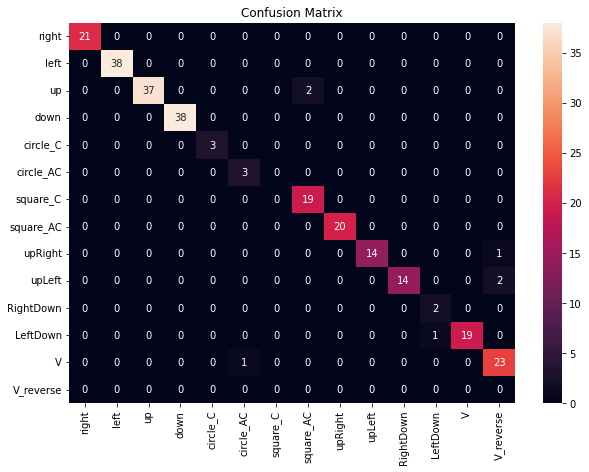

In [28]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


gestureTypeList = ['right', 'left', 'up', 'down', 'circle_C', 'circle_AC',
                     'square_C', 'square_AC', 'upRight', 'upLeft','RightDown', 'LeftDown', 'V', 'V_reverse']

cm=confusion_matrix(y_test, model.predict(X_test))

df_cm = pd.DataFrame(cm, index = [i for i in gestureTypeList],
                  columns = [i for i in gestureTypeList])

# plt.ylabel('Actual')
# plt.xlabel('Predicted')

plt.figure(figsize = (10,7))
plt.title("Confusion Matrix")


sn.heatmap(df_cm, annot=True)

plt.show()

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test) ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        38
           2       1.00      0.95      0.97        39
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00         3
           5       0.75      1.00      0.86         3
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00         2
          11       0.33      0.05      0.09        20
          12       0.00      0.00      0.00        24
          13       0.00      0.00      0.00         0

    accuracy                           0.55       258
   macro avg       0.43      0.43      0.42       258
weighted avg       0.57      0.55      0.55       258



C:\anaconda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\anaconda3\lib\site-packages\sklearn\metrics\_classification.

# Transfer Learning 5 gestures

In [45]:
# 5 gestures for transfer learning
gesture_subset_transfer = ['16','17','18','19','20']

In [133]:
#download data for these 5 gestures

#folders of each user
user_folders=['U01', 'U02', 'U03', 'U04', 'U05', 'U06', 'U07', 'U08']    


column_names = ['System.currentTimeMillis()', 'System.nanoTime()', 'sample.timestamp', 'X', 'Y', 'Z']

df=None

samples = 0
dataset=None

for user in os.listdir(path):
    if os.path.isfile(os.path.join(path, user)): # if not folder -> continue
            continue
    if user in user_folders: 
        for gesture in os.listdir(os.path.join(path, user)): #for each folder with gestures
            if gesture not in gesture_subset_transfer: # continue if folder is not in the set of gestures folders
                continue
            for samplefile in os.listdir(os.path.join(path, user, gesture)): #for in sample folder
                if os.path.isfile(os.path.join(path, user, gesture, samplefile)):# if not folder -> continue
                    
                    df = pd.read_csv(os.path.join(path, user, gesture, samplefile),sep = ' ',names = column_names)
                    df = df[["sample.timestamp", "X", "Y", "Z"]]
                    
                    df['sample.timestamp']=(df['sample.timestamp']-df['sample.timestamp'][0])/100000
                    
                    df["user"] = user
                    df["gesture"] = gesture
                    df["sample"] = str(samplefile[:-4])
                    samples += 1
                    if dataset is None:
                            dataset = df.copy()
                    else:
                            dataset = pd.concat([dataset, df])
                                     
                             
dataset = dataset.sort_values(by=['gesture','user','sample','sample.timestamp'])  
data_transfer = dataset 

data_transfer

,sample.timestamp,X,Y,Z,user,gesture,sample
0,0.0,4.750096,-1.072602,9.040505,U01,16,01
1,1100.0,4.596867,-1.225831,8.734048,U01,16,01
2,2200.0,2.604892,-1.991976,15.476120,U01,16,01
3,3300.0,4.290410,-0.612916,22.064962,U01,16,01
4,4400.0,5.822699,-0.919373,11.951855,U01,16,01
...,...,...,...,...,...,...,...
15,16500.0,-4.443638,1.991976,9.040505,U08,20,20
16,17600.0,-4.137181,2.145205,8.887277,U08,20,20
17,18700.0,-5.056554,1.838747,7.508216,U08,20,20
18,19800.0,-4.290410,1.225831,9.346964,U08,20,20


In [134]:
#split data to training and testing based on userID

data_train_transfer=data_transfer[data_transfer['user'].isin(['U01','U02','U03','U04','U05','U06'])]
data_test_transfer = data_transfer[data_transfer['user'].isin(['U07','U08'])]

data_train_transfer

,sample.timestamp,X,Y,Z,user,gesture,sample
0,0.0,4.750096,-1.072602,9.040505,U01,16,01
1,1100.0,4.596867,-1.225831,8.734048,U01,16,01
2,2200.0,2.604892,-1.991976,15.476120,U01,16,01
3,3300.0,4.290410,-0.612916,22.064962,U01,16,01
4,4400.0,5.822699,-0.919373,11.951855,U01,16,01
...,...,...,...,...,...,...,...
22,24200.0,-3.217807,1.991976,9.193734,U06,20,20
23,25300.0,-3.371036,1.225831,9.040505,U06,20,20
24,26400.0,-3.064578,-1.225831,8.734048,U06,20,20
25,27500.0,-2.911349,0.459687,9.959879,U06,20,20


In [135]:
#scaling

#################  train #######################

dataset_scaled = None

samples = 0

for i, gesture in enumerate(gesture_subset_transfer):
    df_gesture=data_train_transfer[data_train_transfer['gesture']==gesture] 
    for j, user in enumerate(df_gesture['user'].unique()):
        df_user=df_gesture[df_gesture['user']==user]
        for k, sample in enumerate(df_user['sample'].unique()):
            df_sample=df_user[df_user['sample']==sample].copy()
            df_sample.sort_values(by=['sample.timestamp'])

            sc = scaler
            sc = sc.fit_transform(df_sample[["X", "Y", "Z"]])
            sc = pd.DataFrame(data=sc, columns=["X", "Y", "Z"])
            
            df_sample['X'] = sc['X']
            df_sample['Y'] = sc['Y']
            df_sample['Z'] = sc['Z']
            
            if dataset_scaled is None:
                dataset_scaled = df_sample.copy()
            else:
                dataset_scaled = pd.concat([dataset_scaled, df_sample])
            samples += 1
            
data_train_transfer = dataset_scaled 

data_train_transfer

,sample.timestamp,X,Y,Z,user,gesture,sample
0,0.0,1.188359,-0.028750,-0.126813,U01,16,01
1,1100.0,1.118213,-0.191670,-0.177538,U01,16,01
2,2200.0,0.206313,-1.006272,0.938413,U01,16,01
3,3300.0,0.977921,0.460010,2.029001,U01,16,01
4,4400.0,1.679383,0.134170,0.355075,U01,16,01
...,...,...,...,...,...,...,...
22,24200.0,-1.090357,0.964992,1.023366,U06,20,20
23,25300.0,-1.112393,0.832195,0.982492,U06,20,20
24,26400.0,-1.068321,0.407245,0.900744,U06,20,20
25,27500.0,-1.046286,0.699398,1.227737,U06,20,20


In [136]:
#################  test #######################

dataset_scaled = None

samples = 0

for i, gesture in enumerate(gesture_subset_transfer):
    df_gesture=data_test_transfer[data_test_transfer['gesture']==gesture] 
    for j, user in enumerate(df_gesture['user'].unique()):
        df_user=df_gesture[df_gesture['user']==user]
        for k, sample in enumerate(df_user['sample'].unique()):
            df_sample=df_user[df_user['sample']==sample].copy()
            df_sample.sort_values(by=['sample.timestamp'])

            sc = scaler
            sc = sc.fit_transform(df_sample[["X", "Y", "Z"]])
            sc = pd.DataFrame(data=sc, columns=["X", "Y", "Z"])
            
            df_sample['X'] = sc['X']
            df_sample['Y'] = sc['Y']
            df_sample['Z'] = sc['Z']
            
            if dataset_scaled is None:
                dataset_scaled = df_sample.copy()
            else:
                dataset_scaled = pd.concat([dataset_scaled, df_sample])
            samples += 1
            
data_test_transfer = dataset_scaled 

data_test_transfer

,sample.timestamp,X,Y,Z,user,gesture,sample
0,0.0,0.316210,1.128662,-0.359915,U07,16,01
1,1100.0,0.316210,0.967946,-0.518277,U07,16,01
2,2200.0,0.221776,0.646515,0.233945,U07,16,01
3,3300.0,1.008724,1.048304,2.411430,U07,16,01
4,4400.0,1.354981,0.887589,1.540436,U07,16,01
...,...,...,...,...,...,...,...
15,16500.0,-1.091468,0.670649,0.020755,U08,20,20
16,17600.0,-1.015934,0.700858,-0.117617,U08,20,20
17,18700.0,-1.242536,0.640440,-1.362972,U08,20,20
18,19800.0,-1.053701,0.519602,0.297502,U08,20,20


In [137]:
# time slicing

################### train #######################

dataset_timecut = None
samples = 0
damaged = 0

for i, gesture in enumerate(data_train_transfer['gesture'].unique()):
    df_gesture = data_train_transfer[data_train_transfer['gesture']==gesture]
    for j, user in enumerate(df_gesture['user'].unique()):
        df_user = df_gesture[df_gesture['user']==user] 
        time_max = 19 # 18 * 11 = 198
        for i, sample in enumerate(df_user['sample'].unique()):
            df_sample = df_user[df_user['sample']==sample]
            df_sample_count = df_sample.count()['sample.timestamp']
            #print(df_sample_count)
            if df_sample_count >= time_max:
                df_sample = df_sample[df_sample['sample.timestamp'] <= (11 * (time_max-1))]
                df_sample_count = df_sample.count()['sample.timestamp']
                #print(df_sample_count)
            elif df_sample_count < time_max:
                for tmp in range(df_sample_count * 11, (time_max) * 11, 11):
                    df = pd.DataFrame([[tmp, 0.0, 0.0, 0.0, gesture, user, sample]], columns=['sample.timestamp', 'X', 'Y', 'Z', 'gesture', 'user', 'sample'])
                    df_sample = df_sample.append(df, ignore_index=True)            
            #print(df_sample)
            df_sample_count = df_sample.count()['sample.timestamp']
            #print(df_sample_count)
            if df_sample_count != time_max:
                damaged += 1
                continue
            if dataset_timecut is None:
                dataset_timecut = df_sample.copy()
            else:
                dataset_timecut = pd.concat([dataset_timecut, df_sample])
            samples += 1

data_train_transfer = dataset_timecut
data_train_transfer

,sample.timestamp,X,Y,Z,user,gesture,sample
0,0.0,1.188359,-0.028750,-0.126813,U01,16,01
1,1100.0,1.118213,-0.191670,-0.177538,U01,16,01
2,2200.0,0.206313,-1.006272,0.938413,U01,16,01
3,3300.0,0.977921,0.460010,2.029001,U01,16,01
4,4400.0,1.679383,0.134170,0.355075,U01,16,01
...,...,...,...,...,...,...,...
14,15400.0,-1.152695,0.690143,0.454926,U04,20,19
15,16500.0,-0.431704,1.613644,-0.354942,U04,20,19
16,17600.0,-0.992475,0.898675,0.094985,U04,20,19
17,18700.0,-1.032530,0.839095,0.184970,U04,20,19


In [138]:
################### test #######################

dataset_timecut = None
samples = 0
damaged = 0

for i, gesture in enumerate(data_test_transfer['gesture'].unique()):
    df_gesture = data_test_transfer[data_test_transfer['gesture']==gesture]
    for j, user in enumerate(df_gesture['user'].unique()):
        df_user = df_gesture[df_gesture['user']==user] 
        time_max = 19 # 18 * 11 = 198
        for i, sample in enumerate(df_user['sample'].unique()):
            df_sample = df_user[df_user['sample']==sample]
            df_sample_count = df_sample.count()['sample.timestamp']
            #print(df_sample_count)
            if df_sample_count >= time_max:
                df_sample = df_sample[df_sample['sample.timestamp'] <= (11 * (time_max-1))]
                df_sample_count = df_sample.count()['sample.timestamp']
                #print(df_sample_count)
            elif df_sample_count < time_max:
                for tmp in range(df_sample_count * 11, (time_max) * 11, 11):
                    df = pd.DataFrame([[tmp, 0.0, 0.0, 0.0, gesture, user, sample]], columns=['sample.timestamp', 'X', 'Y', 'Z', 'gesture', 'user', 'sample'])
                    df_sample = df_sample.append(df, ignore_index=True)            
            #print(df_sample)
            df_sample_count = df_sample.count()['sample.timestamp']
            #print(df_sample_count)
            if df_sample_count != time_max:
                damaged += 1
                continue
            if dataset_timecut is None:
                dataset_timecut = df_sample.copy()
            else:
                dataset_timecut = pd.concat([dataset_timecut, df_sample])
            samples += 1

data_test_transfer = dataset_timecut
data_test_transfer

,sample.timestamp,X,Y,Z,user,gesture,sample
0,0.0,0.225272,0.524503,-0.959425,U07,16,20
1,1100.0,0.268872,0.524503,-0.866076,U07,16,20
2,2200.0,0.704881,1.527614,1.140938,U07,16,20
3,3300.0,1.446097,0.701522,1.794385,U07,16,20
4,4400.0,1.358895,1.350595,0.394142,U07,16,20
...,...,...,...,...,...,...,...
14,15400.0,-1.030940,0.453766,-0.442910,U08,20,18
15,16500.0,-0.909653,0.420564,0.017036,U08,20,18
16,17600.0,-1.152227,0.586576,-0.136281,U08,20,18
17,18700.0,-0.909653,0.686183,-0.136281,U08,20,18


In [139]:
X_train_t, y_train_t, g_train_t = get_dataset(data_train_transfer)
X_test_t, y_test_t, g_test_t = get_dataset(data_test_transfer)

## Model Transfer

In [167]:
basename = '-'.join(gesture_subset)
basemodel = tf.keras.models.load_model(basename + '_lstm')

model_t = tf.keras.Sequential()

for layer in basemodel.layers[:-1]: # go through until last layer
    layer.trainable= True
    model_t.add(layer)
model_t.add(tf.keras.layers.Dense(len(data_train_transfer), activation='softmax', name="transfer_adjust"))
model_t.build([None, 19, 3])

model_t.compile(loss='sparse_categorical_crossentropy', optimizer=adam_v2.Adam(learning_rate=0.001), metrics=['accuracy'])

In [168]:
model_t.summary()

Model: "sequential_284"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_270 (Bidirecti (None, 256)               135168    
_________________________________________________________________
dropout_270 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_540 (Dense)            (None, 128)               32896     
_________________________________________________________________
transfer_adjust (Dense)      (None, 3021)              389709    
Total params: 557,773
Trainable params: 557,773
Non-trainable params: 0
_________________________________________________________________


In [142]:
history = model_t.fit(
    X_train_t, y_train_t,
    epochs=6,
    batch_size=16,
    validation_split = 0.1,
    shuffle=False
)

Epoch 1/6
9/9 [==============================] - 4s 184ms/step - loss: 7.6989 - accuracy: 0.0070 - val_loss: 7.3256 - val_accuracy: 0.0000e+00
Epoch 2/6
9/9 [==============================] - 1s 100ms/step - loss: 5.5735 - accuracy: 0.5035 - val_loss: 6.0292 - val_accuracy: 0.0625
Epoch 3/6
9/9 [==============================] - 1s 96ms/step - loss: 2.8609 - accuracy: 0.5105 - val_loss: 4.1929 - val_accuracy: 0.3125
Epoch 4/6
9/9 [==============================] - 1s 96ms/step - loss: 1.5092 - accuracy: 0.5944 - val_loss: 2.3241 - val_accuracy: 0.0625
Epoch 5/6
9/9 [==============================] - 1s 115ms/step - loss: 0.6055 - accuracy: 0.7762 - val_loss: 1.3545 - val_accuracy: 0.0000e+00
Epoch 6/6
9/9 [==============================] - 1s 97ms/step - loss: 0.4585 - accuracy: 0.8601 - val_loss: 1.1067 - val_accuracy: 0.0000e+00


In [143]:
model_t.summary()


Model: "sequential_282"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_270 (Bidirecti (None, 256)               135168    
_________________________________________________________________
dropout_270 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_540 (Dense)            (None, 128)               32896     
_________________________________________________________________
transfer_adjust (Dense)      (None, 3021)              389709    
Total params: 557,773
Trainable params: 557,773
Non-trainable params: 0
_________________________________________________________________


In [153]:
model_t.evaluate(X_test_t, y_test_t)


1/1 [==============================] - 0s 66ms/step - loss: 0.6409 - accuracy: 0.7667


[0.6409231424331665, 0.7666666507720947]

In [159]:
y_test_t

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 2, 2, 2, 3], dtype=int64)

In [170]:
y_train_t

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4], dtype=int64)

In [184]:
y_pred_t=model_t.predict(X_test_t)

y_pred_t = np.argmax(y_pred_t,axis=1)


In [187]:
from sklearn.metrics import classification_report

print(classification_report(y_test_t, y_pred_t ))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      21.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       3.0
           3       0.00      0.00      0.00       1.0
          77       0.00      0.00      0.00       0.0
         186       0.00      0.00      0.00       0.0
         643       0.00      0.00      0.00       0.0
         933       0.00      0.00      0.00       0.0
        1203       0.00      0.00      0.00       0.0
        1222       0.00      0.00      0.00       0.0
        1397       0.00      0.00      0.00       0.0
        2109       0.00      0.00      0.00       0.0
        2204       0.00      0.00      0.00       0.0
        2223       0.00      0.00      0.00       0.0
        2377       0.00      0.00      0.00       0.0
        2594       0.00      0.00      0.00       0.0

    accuracy                           0.00      30.0
   macro avg       0.00   

C:\anaconda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\anaconda3\lib\site-packages\sklearn\metrics\_classification.

## Model LSTM 5 gestures

In [ ]:
model_5 = KerasClassifier(build_fn=create_model, verbose=0)

cv = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=1000)

# get the dataset
X, y, g = get_dataset(data_train_transfer)

#cv = cv.split(X, y, g)
batch_size = [19]
epochs = [64, 128]

units = [32,64,128]

dropout_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

param_grid = dict(epochs=epochs, units=units, batch_size=batch_size, dropout_rate=dropout_rate)

print("Hyperparameter tunning started for Dataset for gestures: ", gesture_subset_transfer)

grid = GridSearchCV(estimator=model_5, param_grid=param_grid, n_jobs=1, cv=cv, verbose=1)
grid_result = grid.fit(X, y, groups=g)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
train_mean = grid_result.cv_results_['mean_fit_time']
train_std = grid_result.cv_results_['std_fit_time']
score_mean = grid_result.cv_results_['mean_score_time']
score_std = grid_result.cv_results_['std_score_time']
params = grid_result.cv_results_['params']
for mean, stdev, train_mean, train_std, score_mean, score_std, param in zip(means, stds, train_mean, train_std, score_mean, score_std, params):
    print("accuracy: %f (%f) train time: %f (%f) score time: %f (%f) with: %r" % (mean, stdev, train_mean, train_std, score_mean, score_std, param))

    print("Hyperparameter tunning completed for Dataset: ", gesture_subset_transfer)

Hyperparameter tunning started for Dataset for gestures:  ['16', '17', '18', '19', '20']
Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [ ]:
model_5 = grid_result.best_estimator_

print("Saving model to disk started for Dataset gestures: ", gesture_subset_transfer)

save_model(model_5, gesture_subset_transfer)

In [ ]:
print("Loading model to disk started for Dataset gestures: ", gesture_subset_transfer)

model_5 = load_model(gesture_subset_transfer)

#print(model.model.summary())

print("Loading model to disk completed for Dataset gestures: ", gesture_subset_transfer)



In [ ]:
gestureTypeList_t=['V_mirrorR','S_top', 'S_topM', 'S_down', 'S_downM']

cm=confusion_matrix(y_test_t, y_pred_t)

df_cm = pd.DataFrame(cm, index = [i for i in gestureTypeList_t],
                  columns = [i for i in gestureTypeList_t])

# plt.ylabel('Actual')
# plt.xlabel('Predicted')

plt.figure(figsize = (10,7))
plt.title("Confusion Matrix")


sn.heatmap(df_cm, annot=True)

plt.show()

In [ ]:
y_pred_t=model_5.predict(X_test_t)

y_pred_t = np.argmax(y_pred_t,axis=1)

print(classification_report(y_test_t, y_pred_t )

## Different Percentage

In [ ]:
def getPercentPerClass(df, percent):
    df_down = data_transfer[data_transfer['gesture'] == "16"]
    df_square_AC = data_transfer[data_transfer['gesture'] == "17"]
    df_LeftDown = data_transfer[data_transfer['gesture'] == "18"]
    df_V_mirrorR = data_transfer[data_transfer['gesture'] == "19"]
    df_S_downM = data_transfer[data_transfer['gesture'] == "20"]

    finalDf = df_down.head(int(len(df_down)*(percent/100)))
    finalDf = finalDf.append(df_square_AC.head(int(len(df_square_AC)*(percent/100))))
    finalDf = finalDf.append(df_LeftDown.head(int(len(df_LeftDown)*(percent/100))))
    finalDf = finalDf.append(df_V_mirrorR.head(int(len(df_V_mirrorR)*(percent/100))))
    finalDf = finalDf.append(df_S_downM.head(int(len(df_S_downM)*(percent/100))))

  
  return finalDf


def dividDatasetPer(percent):

    user1_df = data_transfer[data_transfer.userId == 1]
    user2_df = data_transfer[data_transfer.userId == 2]
    user3_df = data_transfer[data_transfer.userId == 3]
    user4_df = data_transfer[data_transfer.userId == 4]
    user5_df = data_transfer[data_transfer.userId == 5]
    user6_df = data_transfer[data_transfer.userId == 6]
    user7_df = data_transfer[data_transfer.userId == 7]
    user8_df = data_transfer[data_transfer.userId == 8]

    data_transfer = getPercentPerClass(user1_df, percent)
    data_transfer = data_transfer.append(getPercentPerClass(user2_df, percent))
    data_transfer = data_transfer.append(getPercentPerClass(user3_df, percent))
    data_transfer = data_transfer.append(getPercentPerClass(user4_df, percent))
    data_transfer = data_transfer.append(getPercentPerClass(user5_df, percent))
    data_transfer = data_transfer.append(getPercentPerClass(user6_df, percent))
    data_transfer = data_transfer.append(getPercentPerClass(user7_df, percent))
    data_transfer = data_transfer.append(getPercentPerClass(user8_df, percent))

    return data_transfer




In [ ]:
dataset_percent = [5,6,7]
acc_withTransfer = []
acc_normal = []
pred_withTransfer = []
pred_normal = []
totalDataset = []

for x in range(3):
    
    for x in dataset_percent:

            print("Looking for Accuracy for " + str(x) + "% dataset")

            percentDf= dividDatasetPer(x)
            totalDataset.append(len(percentDf))
            X_train, y_train, X_test, y_test, X_val, y_val, enc = createDatasetSplit(percentDf)
            transferModel = createTransferLearningModel()
            normalModel = createNormalModel()
            history_Transfer = trainingModel(transferModel,10, 16,X_train, y_train, X_val, y_val)
            history_Normal = trainingModel(normalModel,10, 16,X_train, y_train, X_val, y_val)
            resultTransfer = transferModel.evaluate(X_test, y_test)
            resultNormal = normalModel.evaluate(X_test, y_test)
            print("Accuracy for Transfer Learning with " + str(x) + "% dataset")
            print(resultTransfer)
            print("Accuracy for with normal training with " + str(x) + "% dataset")
            print(resultNormal)
            acc_withTransfer.append(resultTransfer)
            acc_normal.append(resultNormal)
            y_predTransfer = transferModel.predict(X_test)
            y_predNormal = normalModel.predict(X_test)
            pred_withTransfer.append(y_predTransfer)
            pred_normal.append(y_predNormal)

    resultsFromTransfer = []
    resultFromNormal = []

    for result in acc_withTransfer:
        resultsFromTransfer.append(result[1])

    for result in acc_normal:
        resultFromNormal.append(result[1])


    print(resultsFromTransfer)
    print(resultFromNormal)

    import matplotlib.pyplot as plt

    plt.plot(totalDataset,resultsFromTransfer,label = "Transfer")
    plt.plot(totalDataset,resultFromNormal,label = "Normal")
    plt.title('Comparing accuracy with % of dataset with & without Transfer Learning')
    plt.xlabel('number of samples')
    plt.ylabel('accuracy')
    plt.legend()
    plt.rcParams["figure.figsize"] = (10,7)
    plt.show()
    acc_withTransfer = []
    acc_normal = []
    pred_withTransfer = []
    pred_normal = []
    totalDataset = []